# NumPy 快速入门指南
http://crazygit.wiseturtles.com/2017/12/19/numpy-qucikstart/
https://docs.scipy.org/doc/numpy-dev/user/quickstart.html

## 1. 准备 ##
## 2. 基础 ##
  * In NumPy <fc #ff0000>dimensions are called **axes**. The number of axes is **rank**</fc>.

  * <fc #ff0000>Numpy 中，维度被称作 axes, 维度数被称作 rank</fc>。

  * Numpy的数组类是ndarray, 与标准python库的数组不太一样，它包含的元素必须是相同类型的。

  * ndarray的常见属性如下:
    * ndarray.ndim数组的轴数(即rank)
    * ndarray.shape数组的维度，返回的是一个元组，元组的长度值刚好是ndim
    * ndarray.size数组元素的个数
    * ndarray.dtype数组元素的类型
    * ndarray.itemsize数组元素的字节大小
    * ndarray.data数组包含的实际数据(一般情况下不会用到这个属性，都是通过索引来访问元素)

### 2.1. 数组例子 ###

In [2]:
import numpy as np
a = np.arange(15).reshape(3,5)
a
# array([[ 0,  1,  2,  3,  4],           <--- dimensions are called axes. The number of axes is rank.
#        [ 5,  6,  7,  8,  9],           <--- 2 dimension ndarray, 有 2 個 axes, 所以 rank 2 
#        [10, 11, 12, 13, 14]])

# >>> type(a)
# numpy.ndarray

# >>> a.ndim
# 2

# >>> a.size
# 15

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

### 2.2. 创建数组 ###
### 2.3. 打印数组 ###
### 2.4. 基本操作 ###

In [10]:
# 数组的算术运算会自动作用于每个元素，并返回一个新的数组
a = np.array([20,30,40,50])
b = np.arange(4)
c = a - b
c

array([20, 29, 38, 47])

In [ ]:
# >>> b**2
# array([0, 1, 4, 9])

# >>> 10 * np.sin(a)
# array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

# >>> a < 35
# array([ True,  True, False, False], dtype=bool)

In [11]:
# 返回的是每个元素相乘的结果，要实现矩阵乘法，需要使用dot函数
a = np.array([ [1, 1],
               [0, 1]])

b = np.array([ [2, 0],
               [3, 4]])

a * b       # 对应位置的元素相乘

array([[2, 0],
       [0, 4]])

In [12]:
a.dot(b)   # 矩阵乘法

# np.dot(a, b) # 另一种形式的矩阵乘法
# array([[5, 4],
#        [3, 4]])

array([[5, 4],
       [3, 4]])

In [13]:
# 一些操作， 如 += 和 *= 是直接修改原有的数组，而不是新建一个
a = np.ones((2,3), dtype=int)
# a
# array([[1, 1, 1],
#        [1, 1, 1]])
# a.dtype
# dtype('int64')

b = np.random.random((2,3))
b
# b.dtype
# dtype('float64')

array([[ 0.98690839,  0.93322052,  0.34246596],
       [ 0.9439905 ,  0.39881946,  0.47363398]])

In [14]:
b+=a
b

array([[ 1.98690839,  1.93322052,  1.34246596],
       [ 1.9439905 ,  1.39881946,  1.47363398]])

In [15]:
# 报错的原因是因为a数组原来是保存int64类型，现在没法保存float64类型
a+=b

TypeError: Cannot cast ufunc add output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [16]:
# 当不同类型的数组运算操作时，总是向精度更高的自动转换
a = np.ones(3, dtype=np.int32)
b = np.linspace(0, np.pi, 3)

# b.dtype.name
# 'float64'
c = a + b
c

# >>> c.dtype.name
# 'float64'

array([ 1.        ,  2.57079633,  4.14159265])

In [17]:
d = np.exp(c*1j)
d
# >>> d.dtype.name
# 'complex128'

array([ 0.54030231+0.84147098j, -0.84147098+0.54030231j,
       -0.54030231-0.84147098j])

In [18]:
# ndarray包含了很多一元运算。如求和等
a = np.arange(15).reshape(3, 5)
a

# a.sum()
# 105

# a.min()
# 0

# a.max()
# 14

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [19]:
# 默认情况下，这些操作都是作用于每一个元素，而不管它的维度。但是，我们也可以通过axis参数来限定操作的轴
b = np.arange(12).reshape(3, 4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
# 计算每一列的和
b.sum(axis=0)

array([12, 15, 18, 21])

In [21]:
# 计算每一行的最小值
b.min(axis=1)

array([0, 4, 8])

In [22]:
# 每一行累积和
b.cumsum(axis=1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38]])

### 2.5. 通用函数 ###
Numpy提供了很多常见的数学上的运算，如sin, cos, exp。在 Numpy 中，我们称这些为 ”**universal functions**”（**ufunc**）

In [23]:
B = np.arange(3)
B

array([0, 1, 2])

In [24]:
np.exp(B)
# 2.71828183 * 2.71828183 => 7.389056107308149

array([ 1.        ,  2.71828183,  7.3890561 ])

In [25]:
np.sqrt(B)

array([ 0.        ,  1.        ,  1.41421356])

In [26]:
C = np.array([2., -1., 4.])
np.add(B, C)

array([ 2.,  0.,  6.])

### 2.6. 索引，切片和迭代 ###

## 3. shape操作

### 3.1. 改变数组的shape

许多函数都可以改变数组的shape，但是它们都是返回一个新的修改后的数组，并不会改变原数组

In [47]:
a = np.floor(10*np.random.random((3,4)))
a.shape

(3, 4)

In [48]:
a

array([[ 0.,  9.,  2.,  4.],
       [ 8.,  4.,  9.,  3.],
       [ 3.,  0.,  1.,  7.]])

In [49]:
# 返回降维的数组
a.ravel()

array([ 0.,  9.,  2.,  4.,  8.,  4.,  9.,  3.,  3.,  0.,  1.,  7.])

In [50]:
# 直接修改shape
>>> a.reshape(6,2)

array([[ 0.,  9.],
       [ 2.,  4.],
       [ 8.,  4.],
       [ 9.,  3.],
       [ 3.,  0.],
       [ 1.,  7.]])

In [51]:
# 数组转置
a.T

array([[ 0.,  8.,  3.],
       [ 9.,  4.,  0.],
       [ 2.,  9.,  1.],
       [ 4.,  3.,  7.]])

In [52]:
a.T.shape

(4, 3)

In [53]:
a.shape

(3, 4)

In [54]:
# reshape 返回修改后的数组，不改变数组本身，但是 resize 函数直接修改原数组
a

array([[ 0.,  9.,  2.,  4.],
       [ 8.,  4.,  9.,  3.],
       [ 3.,  0.,  1.,  7.]])

In [55]:
a.resize((2,6))
a

array([[ 0.,  9.,  2.,  4.,  8.,  4.],
       [ 9.,  3.,  3.,  0.,  1.,  7.]])

In [56]:
# 如果一个维度为的是-1, 那么reshape函数会自动计算它的值。
a

array([[ 0.,  9.,  2.,  4.,  8.,  4.],
       [ 9.,  3.,  3.,  0.,  1.,  7.]])

In [57]:
a.reshape(3, -1)

array([[ 0.,  9.,  2.,  4.],
       [ 8.,  4.,  9.,  3.],
       [ 3.,  0.,  1.,  7.]])

### 3.2. 数组合并

多个数组可以根据不同的轴组合在一起

In [58]:
a = np.floor(10*np.random.random((2,2)))
a

array([[ 8.,  9.],
       [ 7.,  0.]])

In [59]:
b = np.floor(10*np.random.random((2,2)))
b

array([[ 5.,  0.],
       [ 5.,  3.]])

In [60]:
np.vstack((a, b))

array([[ 8.,  9.],
       [ 7.,  0.],
       [ 5.,  0.],
       [ 5.,  3.]])

In [61]:
np.hstack((a,b))

array([[ 8.,  9.,  5.,  0.],
       [ 7.,  0.,  5.,  3.]])

In [62]:
# column_stack函数把1维数组当做列来拼成2维数组，如果只是操作2维数组，跟hstack的等效。

# 操作2维数组，等效于hstack
np.column_stack((a, b))

array([[ 8.,  9.,  5.,  0.],
       [ 7.,  0.,  5.,  3.]])

In [63]:
a = np.array([4., 2.])
b = np.array([3., 8.])

# 操作1维数组，返回2维数组，a,b分别为2维数组的列
np.column_stack((a, b))

array([[ 4.,  3.],
       [ 2.,  8.]])

In [64]:
from numpy import newaxis
# 将1维数组变成2维数组
a[:,newaxis]

array([[ 4.],
       [ 2.]])

In [65]:
# 都是操作二维数组，下面两个操作column_stack和hstack等效
np.column_stack((a[:, newaxis], b[:, newaxis]))

array([[ 4.,  3.],
       [ 2.,  8.]])

In [66]:
np.hstack((a[:, newaxis], b[:, newaxis]))

array([[ 4.,  3.],
       [ 2.,  8.]])

In [68]:
# 另外不论什么数组，row_stack 函数等效于 vstack。通常来说，2维以上的数组，hstack基于第2根轴做运算，vstack基于第1根轴，concatenate函数额外多接受一个参数，可以指定基于哪根轴做数组的合并操作。

# 另外, r_ 和 c_ 函数对于在一个轴上组合数据相当哟偶用，他们允许使用范围符号:
np.r_[1:4, 0, 4]

array([1, 2, 3, 0, 4])

### 3.3. 数组切割

In [70]:
# 使用hsplit函数，你可以在水平方向切割一个数组

## 4. 复制和视图(Views) 
当进行数组运算和改变数组时，有时候数据是被复制到一个新的数组，有时候不是。对于初学者来说，对于具体是哪种操作，很容易混淆。 主要分三种情况。

### 4.1. 一点也不复制

In [29]:
a = np.arange(12)
b = a     # 不会有新对象产生
b is a    # a 和 b是同一个数组
# True

# a.shape
# (12,)

# b.shape
# (12,)

(12,)

In [30]:
b.shape = 3, 4  # 改变b的shape, a也同样变化
a.shape

(3, 4)

In [31]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
# python中使用可变参数时，可以看做是引用传参，因此函数条用会产生新的数组
def f(x):
    print(id(x))

# id(a)
# 4361164320

# f(a)
# 4361164320

### 4.2. 视图(View)和浅复制(Shallow Copy)

不同的数组可以共享数据，view 函数可以创造一个数据相同的新数组

改了视图的值，原來的變數值也跟著變了

一个数组的切片返回的就是它的视图

In [33]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
c = a.view()

c is a   # c和a不是同一个数组

False

In [35]:
c.base is a  # c是a的数据的视图

True

In [36]:
c.flags.owndata

False

In [37]:
c.shape = 2, 6  # a的不会改变
a.shape

(3, 4)

In [38]:
c[0, 4] = 1234  # a的数据发生改变
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

In [39]:
c

array([[   0,    1,    2,    3, 1234,    5],
       [   6,    7,    8,    9,   10,   11]])

In [40]:
# 一个数组的切片返回的就是它的视图
s = a [:, 1:3]
s

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [41]:
s[:] = 10    # s[:] 是 a 的视图, 改了 s 的內容, a 也改了
s

array([[10, 10],
       [10, 10],
       [10, 10]])

In [46]:
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

### 4.3. 深度复制(Deep Copy)

copy方法 可以完全复制数组和它的数据

In [ ]:
a = np.arange(12).reshape((3,4))
a
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [43]:
d = a.copy()
d is a

False

In [42]:
d.base is a

False

In [44]:
d[0, 0] = 9999
d

array([[9999,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

In [45]:
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

### 4.4. 函数和方法概览

## 5. Less Basic ##
### 5.1. 广播机制 ###
### 5.2. 索引 ###
### 5.3. 数组索引 ###

In [92]:
a = np.arange(12) ** 2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [93]:
i = np.array([1,1,3,8,5])
i

array([1, 1, 3, 8, 5])

In [94]:
# 返回 a 中在索引 i 的元素
a[i]

array([ 1,  1,  9, 64, 25])

In [95]:
# 二维数组索引，返回 a 中在索引 j 的元素
j = np.array([[3,4], [9,7]])
a[j]
array([[ 9, 16],
       [81, 49]])

In [96]:
# 当数组索引作用在多维数组时，是根据数组的第一个维度来索引的。
palette = np.array([ [0 , 0, 0],
                     [255, 0, 0],
                     [0, 255, 0],
                     [0, 0, 255],
                     [255, 255, 255] ])

image = np.array([ [0, 1, 2, 0],
                   [0, 3, 4, 0] ])
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

In [97]:
# 索引同样可以是多维的，但是必须是相同的 shape
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [99]:
# indices for the first dim of a
i = np.array([[0,1],
              [1,2] ])

# indices for the second dim
j = np.array([[2, 1],
              [3, 3] ])

# i and j must have equal shape
# 返回的结果是是[ [a[0,2], a[1,1]
#                [a[1,3], a[2, 3] ]
a[i, j]

array([[ 2,  5],
       [ 7, 11]])

In [100]:
# [ a[0,2], a[1, 2],
#   a[1,2], a[2, 2] ]
a[i, 2]

array([[ 2,  6],
       [ 6, 10]])

In [101]:
# [[[ a[0,2], a[0,1],
#     a[0,3], a[0,3]],
#
#     a[1,2], a[1,1],
#     a[1,3], a[1,3]],
#
#     a[2,2], a[2,1],
#     a[2,3], a[2,3]]]
a[:, j]

array([[[ 2,  1],
        [ 3,  3]],

       [[ 6,  5],
        [ 7,  7]],

       [[10,  9],
        [11, 11]]])

In [102]:
# 同样，我们可以把i和j放在一个列表里，然后用列表做索引
l = [i, j]

# 等价于a[i, j]
a[l]

array([[ 2,  5],
       [ 7, 11]])

In [103]:
# 但是，我们不可以把i和j放在一个数组里，因为数组索引是作用在第一个维度上的。
s = np.array([i, j])
s

array([[[0, 1],
        [1, 2]],

       [[2, 1],
        [3, 3]]])

In [104]:
a[s]

IndexError: index 3 is out of bounds for axis 0 with size 3

In [105]:
# 等价于 a[i, j]
a[tuple(s)]

array([[ 2,  5],
       [ 7, 11]])

In [106]:
# 我们同样可以给数组索引赋值
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [107]:
a[[1,3,4]] = 0
a

array([0, 0, 2, 0, 0])

In [108]:
# 但是当列表包含相同的索引时，这个位置会被赋值多次，最终只保留最后一次的值
a = np.arange(5)
a[[0, 0, 2]] = [1,2,3]
a

array([2, 1, 3, 3, 4])

In [109]:
# 上面看起来很合理，但是当使用+=符号的时候，结果和我们想的可能不太一样
a = np.arange(5)
a[[0, 0, 2]] += 1
a
# 尽管索引中出现了两次0，但是第0个元素它只加了1次。

array([1, 1, 3, 3, 4])

### 5.4. 布尔数组索引 ###

当使用数字数组索引时，我们提供了哪些元素要被索引的信息。但是当使用布尔数组时，我们是明确哪些元素需要，哪些元素不需要。

In [83]:
a = np.arange(12).reshape((3,4))
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [84]:
b = a > 4       # element-wise comparision
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [85]:
a[b]            # 厲害！ same as a[a>4] !

array([ 5,  6,  7,  8,  9, 10, 11])

#### 这个特性非常适合用来赋值

In [86]:
# 所有大于4的元素都赋值为0
a[b] = 0        # same as a[a>4] = 0
a

array([[0, 1, 2, 3],
       [4, 0, 0, 0],
       [0, 0, 0, 0]])

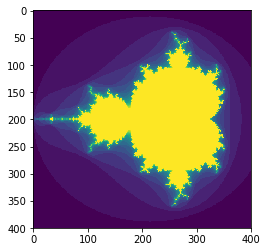

In [87]:
# 一个使用布尔数组索引的例子就是曼德博集合(Mandelbrot set)

import numpy as np
import matplotlib.pyplot as plt
def mandelbrot( h,w, maxit=20 ):
    """Returns an image of the Mandelbrot fractal of size (h,w)."""
    y,x = np.ogrid[ -1.4:1.4:h*1j, -2:0.8:w*1j ]
    c = x+y*1j
    z = c
    divtime = maxit + np.zeros(z.shape, dtype=int)

    for i in range(maxit):
        z = z**2 + c
        diverge = z*np.conj(z) > 2**2            # who is diverging
        div_now = diverge & (divtime==maxit)  # who is diverging now
        divtime[div_now] = i                  # note when
        z[diverge] = 2                        # avoid diverging too much

    return divtime
plt.imshow(mandelbrot(400,400))
plt.show()

In [88]:
# 另一个布尔数组的场景跟数字数组索引类似，对每个维度，我们提供一个1维的数组来选择我们需要的切片
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [89]:
b1 = np.array([False, True, True])
b2 = np.array([True, False, True, False])
# 选择行

a[b1, :]        # same as a[b1]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [90]:
# 选择列
a[:, b2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [91]:
# a weird thing to do
a[b1, b2]

array([ 4, 10])

### 5.5. ix_()函数 （作用待定） ###
### 5.6. 字符串索引 ###

In [72]:
# Numpy提供了创建结构化的数组的能力，可以通过列名来操作数据

# dtype分别制定每一个的名字和数据类型
x = np.array([(1, 2., 'Hello'), (2, 3., "World")], dtype=[('foo', 'i4'), ('bar', 'f4'), ('baz', 'S10')])
x[1]

(2,  3., b'World')

In [73]:
x['foo']

array([1, 2], dtype=int32)

In [74]:
x['bar']

array([ 2.,  3.], dtype=float32)

In [75]:
x['baz']

array([b'Hello', b'World'],
      dtype='|S10')

## 6. 更多 ##
## 7. 扩展阅读 ##